In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from matplotlib import animation
import seaborn as sns

import numpy as np
from sklearn.linear_model import LinearRegression


In [2]:
rng = np.random.default_rng()

In [3]:
n_sample = 50
x_obs = rng.uniform(0,5,n_sample)
x_vals = np.linspace(0,5,n_sample)
a = 1
b = 1
y_true = a + b*x_obs
y_obs = y_true + rng.normal(0,1,n_sample)

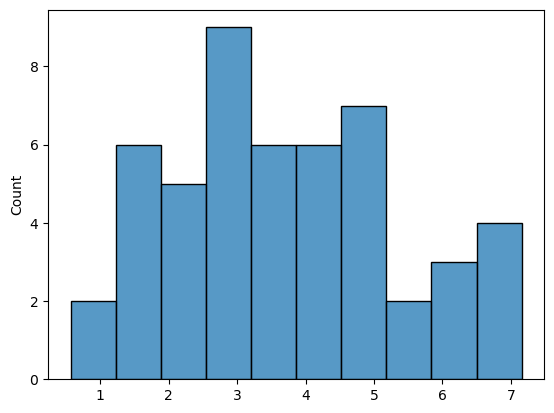

In [6]:
sns.histplot(y_obs,bins=10);

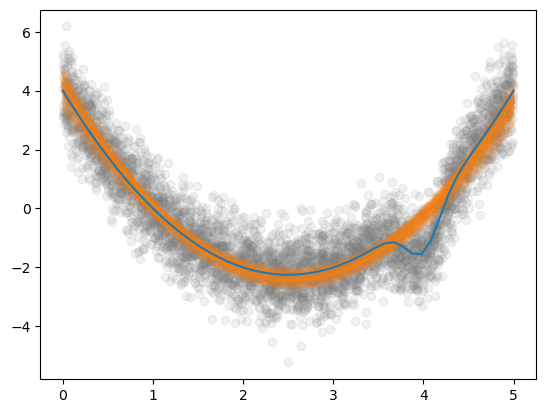

In [86]:
n_sample = 50
x_vals = np.linspace(0,5,n_sample)

n_exp = 100

a = 4
b = -5
c = 1

rbf_scale_1 = 1.5
rbf_loc_1 = 4
rbf_length_1 = 0.25

def f(x_vals):
    y_true = a + b*x_vals + c*x_vals**2
    y_true -= rbf_scale_1 * np.exp(-(x_vals-rbf_loc_1)**2/(rbf_length_1)**2)
    return y_true

y_true = f(x_vals)

x_obs_arr = []
y_obs_arr = []
y_pred_arr = []


for _ in range(0,n_exp):
    x_obs = rng.uniform(0,5,n_sample)
    y_obs =  f(x_obs) + rng.normal(0,0.75,n_sample)

    X = np.array([x_obs,x_obs**2]).T
    reg = LinearRegression().fit(X,y_obs)
    y_pred = reg.predict(np.array([x_vals,x_vals**2]).T)


    # X = np.array([x_obs,x_obs**2,x_obs**3,x_obs**4]).T
    # reg = LinearRegression().fit(X,y_obs)
    # y_pred = reg.predict(np.array([x_vals,x_vals**2,x_vals**3,x_vals**4]).T)


    x_obs_arr.append(x_obs)
    y_obs_arr.append(y_obs)
    y_pred_arr.append(y_pred)
    

for i in range(0,n_exp):
    plt.scatter(x_obs_arr[i], y_obs_arr[i],alpha=0.1,color='tab:gray')
    
for i in range(0,n_exp):
    plt.plot(x_vals,y_pred_arr[i],alpha=0.1, color='tab:orange')

plt.plot(x_vals, y_true, color='tab:blue')

